In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16869008361844921997
xla_global_id: -1
]


In [6]:
#{"R": [R], "D": [D],"H": [H], "F":[log10(f)],"RP": [RP]})
DATA = pd.read_csv("DATA/data.csv")
DATA.pop("Unnamed: 0")

ROW_NUM = len(DATA.index)
print(ROW_NUM)
TRAINING_NUM = int(ROW_NUM / 10 * 7)
VALIDATION_NUM = int(ROW_NUM / 20 * 3 )

TRAINING_DATA = DATA.iloc[ :TRAINING_NUM,:]
VALIDATION_DATA = DATA.iloc[TRAINING_NUM:TRAINING_NUM+VALIDATION_NUM,:]
TEST_DATA = DATA.iloc[TRAINING_NUM+VALIDATION_NUM:,:]
TRAINING_VAL = pd.DataFrame(TRAINING_DATA.pop('RP'))
VALIDATION_VAL = pd.DataFrame(VALIDATION_DATA.pop('RP'))
TEST_VAL = pd.DataFrame(TEST_DATA.pop('RP'))

DATA.pop('RP')


282240


0        -123.180388
1        -119.671868
2        -130.180711
3        -111.274042
4        -105.454858
             ...    
282235   -120.310835
282236   -114.146743
282237   -128.781605
282238   -112.158097
282239   -112.245129
Name: RP, Length: 282240, dtype: float64

In [7]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
min_max_scaler.fit(DATA)
joblib.dump(min_max_scaler, "MLP.scaler.gz") 

TRAINING_DATA = min_max_scaler.transform(TRAINING_DATA)
TRAINING_DATA = pd.DataFrame(TRAINING_DATA)
VALIDATION_DATA = min_max_scaler.transform(VALIDATION_DATA)
VALIDATION_DATA = pd.DataFrame(VALIDATION_DATA)
TEST_DATA = min_max_scaler.transform(TEST_DATA)
TEST_DATA = pd.DataFrame(TEST_DATA)

mae_4_lr:0.0001-320-1_e:1000_b:100
Epoch 1/1000


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1976/1976 [==============================] - 2s 1ms/step - loss: 101.6187 - val_loss: 71.6882
Epoch 2/1000
1976/1976 [==============================] - 2s 1ms/step - loss: 33.5364 - val_loss: 9.5592
Epoch 3/1000
1976/1976 [==============================] - 2s 833us/step - loss: 9.1768 - val_loss: 8.5159
Epoch 4/1000
1976/1976 [==============================] - 2s 814us/step - loss: 8.0579 - val_loss: 7.4282
Epoch 5/1000
1976/1976 [==============================] - 2s 774us/step - loss: 7.0465 - val_loss: 6.6593
Epoch 6/1000
1976/1976 [==============================] - 2s 774us/step - loss: 6.4969 - val_loss: 6.3790
Epoch 7/1000
1976/1976 [==============================] - 2s 819us/step - loss: 6.3370 - val_loss: 6.3194
Epoch 8/1000
1976/1976 [==============================] - 2s 826us/step - loss: 6.2903 - val_loss: 6.2880
Epoch 9/1000
1976/1976 [==============================] - 2s 791us/step - loss: 6.2585 - val_loss: 6.2652
Epoch 10/1000
1976/1976 [==============================] - 

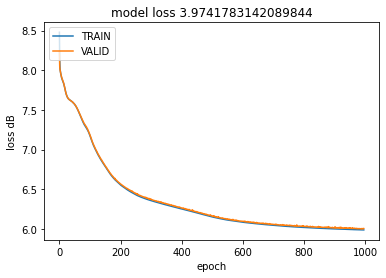

mae_4_lr:0.001-320-1_e:1000_b:100
Epoch 1/1000


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1976/1976 [==============================] - 2s 1ms/step - loss: 3.9872 - val_loss: 4.0033
Epoch 2/1000
1976/1976 [==============================] - 2s 794us/step - loss: 3.9876 - val_loss: 4.0007
Epoch 3/1000
1976/1976 [==============================] - 2s 790us/step - loss: 3.9860 - val_loss: 4.0238
Epoch 4/1000
1976/1976 [==============================] - 2s 1ms/step - loss: 3.9821 - val_loss: 4.0027
Epoch 5/1000
1976/1976 [==============================] - 2s 1ms/step - loss: 3.9833 - val_loss: 3.9841
Epoch 6/1000
1976/1976 [==============================] - 2s 810us/step - loss: 3.9807 - val_loss: 3.9864
Epoch 7/1000
1976/1976 [==============================] - 1s 744us/step - loss: 3.9821 - val_loss: 3.9848
Epoch 8/1000
1976/1976 [==============================] - 2s 778us/step - loss: 3.9808 - val_loss: 3.9946
Epoch 9/1000
1976/1976 [==============================] - 2s 789us/step - loss: 3.9795 - val_loss: 3.9808
Epoch 10/1000
1976/1976 [==============================] - 2s 764

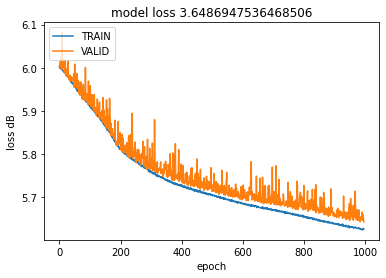

mae_4_lr:0.01-320-1_e:1000_b:100
Epoch 1/1000


/Users/shsf/.local/share/virtualenvs/code-gcDAJfEO/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1976/1976 [==============================] - 3s 1ms/step - loss: 3.7769 - val_loss: 3.8242
Epoch 2/1000
1976/1976 [==============================] - 2s 794us/step - loss: 3.7685 - val_loss: 3.7956
Epoch 3/1000
1976/1976 [==============================] - 2s 1ms/step - loss: 3.7638 - val_loss: 3.9216
Epoch 4/1000
1976/1976 [==============================] - 2s 1ms/step - loss: 3.7659 - val_loss: 3.7684
Epoch 5/1000
1976/1976 [==============================] - 2s 812us/step - loss: 3.7604 - val_loss: 3.8090
Epoch 6/1000
1976/1976 [==============================] - 1s 755us/step - loss: 3.7627 - val_loss: 3.7280
Epoch 7/1000
1976/1976 [==============================] - 2s 763us/step - loss: 3.7541 - val_loss: 3.8467
Epoch 8/1000
1976/1976 [==============================] - 2s 771us/step - loss: 3.7490 - val_loss: 3.7630
Epoch 9/1000
1976/1976 [==============================] - 2s 803us/step - loss: 3.7520 - val_loss: 3.7744
Epoch 10/1000
1976/1976 [==============================] - 2s 760

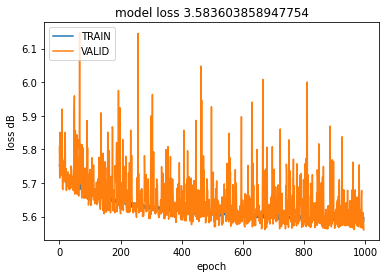

In [10]:


model = keras.models.Sequential([
    keras.layers.Dense(320,activation="tanh", input_dim=4),
    keras.layers.Dense(1, activation="linear")
])

learning_rates = (0.0001, 0.001, 0.01)

for learning_rate in learning_rates:
    optimizer = keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="mean_absolute_error", optimizer=optimizer)

    epochs=1000
    batch=100


    model_name = f"mae_{model.layers[0].input_shape[1]}_lr:{learning_rate}"
    for layer in model.layers:
        model_name+=f"-{layer.output_shape[1]}"
    model_name += f"_e:{epochs}_b:{batch}"
    print(model_name)


    history = model.fit(TRAINING_DATA, TRAINING_VAL, epochs=epochs, batch_size=batch, validation_data=(VALIDATION_DATA, VALIDATION_VAL))
    model.save(f"MODELS/{model_name}.h5")

    from math import log10

    scores = model.evaluate(TEST_DATA, TEST_VAL, batch_size=20)
    plt.plot([10*log10(loss) for loss in history.history['loss'][4:]])
    plt.plot([10*log10(loss) for loss in history.history['val_loss'][4:]])
    plt.title(f'model loss {scores}')
    plt.ylabel('loss dB')
    plt.xlabel('epoch')
    plt.legend(['TRAIN', 'VALID'], loc='upper left')
    plt.savefig(f"TRAINING_PROCESS/{model_name}.png")
    plt.show()


In [16]:
TEST_DATA = TEST_DATA.iloc[:30,:]
PREDICTIONS = pd.DataFrame(model.predict(TEST_DATA))
PREDICTIONS.columns=["PREDICITONS"]

TEST_VAL = TEST_VAL.iloc[:30,:]
TEST_VAL.columns=["TEST_VAL"]
TEST_VAL = TEST_VAL.reset_index(drop=True)

result=pd.concat([PREDICTIONS, TEST_VAL], axis=1)
result["ERROR"] = result["PREDICITONS"] - result["TEST_VAL"]
result.to_csv("MLP.csv")
